# Vježba 4 - Analiza linearnih, vremenski nepromjenljivih sistema u vremenskom domenu

Veza između ulaznog i izlaznog niza linearnog, vremenski nepromjenljivog sistema određena je linearnom jednačinom diferencija sa konstantnim koeficijentima. U opštem slučaju ova jednačina ima sledeći oblik:
$$
\sum_{k = 0}^{N}{a_{k} y(n - k)} = \sum_{l = 0}^{M}{b_{l} x(n - l)}
$$
U Python-u jednačina diferencija se može predstaviti korištenjem dva vektora: jedan vektor sadrži koeficijente u direktnoj sprezi $b_l$, a drugi koeficijente u povratnoj sprezi $a_k$. Obično se smatra da je koeficijent $a_{0} \ne 0$ pa se može pisati:
$$
y(n) = -\frac{1}{a_0}\left(\sum_{k = 1}^{N}{a_{k} y(n - k)} + \sum_{l = 0}^{M}{b_{l} x(n - l)}\right)
$$

## Zadaci

1. Napisati u Python-u funkciju koja vrši računanje odziva diskretnog sistema opisanog koeficijentima $b$ i $a$ za proizvoljan ulaz $x$. Izlaz iz filtra treba da bude istih dimenzija kao i ulazni signal.

In [39]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as pyplot
import scipy.signal as signal

def yOldI(yOld, last, index):
    return yOld[last - index]

def filt(b, a, x):
    a0 = a[0]
    a1 = a[1:]
    y = np.empty(x.size)
    yOld = np.zeros(a1.size)
    last = 0
    
    for n in range(y.size):
        toTakeX = min(n + 1, x.size, b.size)
        takeFrom = 0 if n + 1 <= b.size else n + 1 - b.size
        xSum = np.dot(b[: toTakeX], x[takeFrom : takeFrom + toTakeX][::-1])
        
        ySum = 0
        for yIndex in range(a1.size):
            ySum += a1[yIndex] * yOldI(yOld, last, yIndex)
        
        result = (1 / a0) * (xSum - ySum)
        y[n] = result
        
        if a1.size > 0:
            last += 1
            last %= yOld.size
            yOld[last] = y[n]
        
          
    return y

x = np.array([1, 2, 3], dtype=np.float64)
a = np.array([1, 2 ], dtype=np.float64)
b = np.array([1, 1, 3], dtype=np.float64)

res = filt(b, a, x)
scipyRes = signal.lfilter(b, a, x)
print(res)
print(scipyRes)


[1. 1. 6.]
[1. 1. 6.]


2. Korištenjem funkcije napisane u prethodnoj tački odrediti impulsni odziv mreže opisane jednačinom diferencija:
$$
y(n) - \frac{5}{6}y(n-1)+\frac{1}{6}y(n-2) = x(n)
$$
Impulsni odziv nacrtati na intervalu $-10 \le n \le 100$.

[1.]
[1.]


<IPython.core.display.Javascript object>


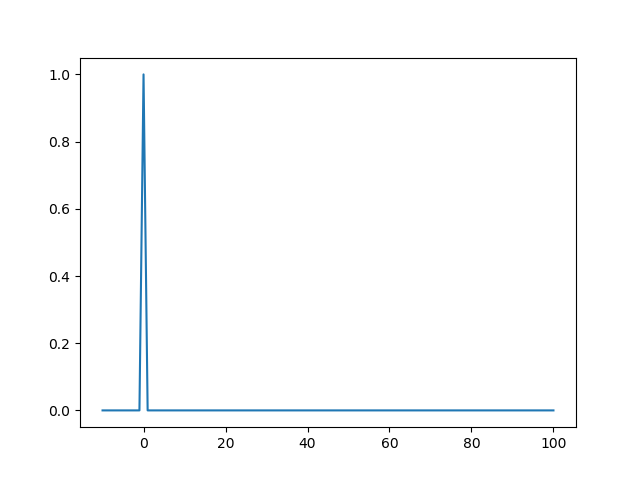

In [45]:
a = np.array([1, -5 / 6, 1 / 6])
b = np.array([1])
x = np.array([1])

y1 = filt(b, a, x)
y2 = signal.lfilter(b, a, x)
print(y1)
print(y2)
y = np.pad(y1, (10, 100 - (y1.size - 1)), "constant", constant_values = 0)
x = np.arange(-10, 101)
pyplot.plot(x, y)

3. Učitati zvučni signal u fajlu handel_mono_11025.wav. Propustiti ovaj signal kroz filtar implementiran u prethodnoj tački sa koeficijentima:
$$a. b_0=0.0572, b_1=0.1144, b_2=0.0572; a_0 = 1, a_1= -1.2189, a_2=0.4477 \\
b. b_0=0.6666, b_1=-1.3333, b_2= 0.6666; a_0 = 1, a_1= -1.2189, a_2=0.4477 \\
c. b_0=0.2625, b_1=0, b_2= -0.2625; a_0 = 1, a_1=-1.0932, a_2=0.4750
$$
Prikazati i poslušati originalni i rezultujuće signale. Komentarisati razlike.

In [56]:
import sounddevice as sd
import scipy.io.wavfile as wavfile

ab = np.array([0.0572, 0.114, 0.0572])
aa = np.array([1, -1.2189, 0.4477])
bb = np.array([0.6666, -1.3333, 0.6666])
ba = np.array([1, -1.2189, 0.4477])
cb = np.array([0.2625, 0, -0.2625])
ca = np.array([1, -1.0932, 0.4750])

(sampleRate, snd) = wavfile.read("handel_mono_11025.wav")
resultA = signal.lfilter(ab, aa, snd)
resultB = signal.lfilter(bb, ba, snd)
resultC = signal.lfilter(cb, ca, snd)
sd.play(snd, sampleRate)
sd.wait()
sd.play(resultA.astype(np.int16), sampleRate)
sd.wait()
sd.play(resultB.astype(np.int16), sampleRate)
sd.wait()
sd.play(resultC.astype(np.int16), sampleRate)